In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [5]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [6]:
# Load dataset
df = pd.read_csv('data.csv')

# Drop unwanted columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Convert target variable 'diagnosis' to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for nulls
print(df.isnull().sum())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")


Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


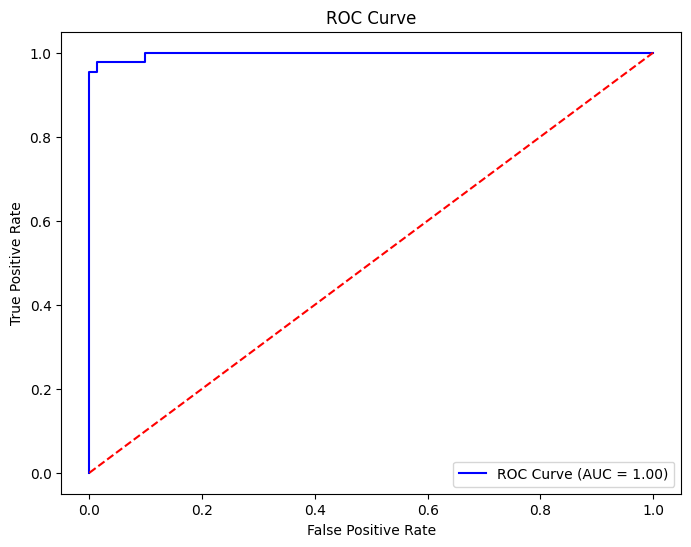

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [11]:
# Example: Change threshold from default 0.5 to 0.3
from sklearn.metrics import precision_score, recall_score

new_threshold = 0.3
y_pred_new = (y_prob >= new_threshold).astype(int)

print("\nNew Confusion Matrix at Threshold 0.3:\n", confusion_matrix(y_test, y_pred_new))
print("\nPrecision:", precision_score(y_test, y_pred_new))
print("Recall:", recall_score(y_test, y_pred_new))



New Confusion Matrix at Threshold 0.3:
 [[67  4]
 [ 1 42]]

Precision: 0.9130434782608695
Recall: 0.9767441860465116


### Step 8: Sigmoid Function Explanation

Logistic Regression uses the **Sigmoid Function** to convert raw linear output into probabilities between 0 and 1.

**Sigmoid Formula:**

\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

**Purpose:**  
The sigmoid function maps any real value into a range between 0 and 1, making it suitable for binary classification.

**Example:**  
If output is **0.8**, it means 80% probability that the sample belongs to class 1 (Malignant in this case).
